# Linear Discriminant Analysis (LDA) — From Scratch

In this notebook, we implement **Linear Discriminant Analysis (LDA)** using only NumPy — no scikit-learn.

We will:

- Generate a 2-class dataset  
- Visualize the data  
- Compute class means  
- Compute within-class scatter  
- Compute the optimal projection vector  
- Train/predict LDA manually  
- Visualize the linear decision boundary  
- Evaluate accuracy  

LDA finds a direction **w** that *maximizes separation between class means*.

## What is LDA?

LDA projects data onto a line:

$$
z = w^T x
$$

and chooses **w** to maximize:

$$
J(w) = \frac{(m_1 - m_0)^2}{s_1^2 + s_0^2}
$$

Where:

- $m_0, m_1$ → projected means  
- $s_0^2, s_1^2$ → projected variances  

LDA produces a **straight linear decision boundary** in 2D.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
np.random.seed(42)

## 1. Create a Synthetic Dataset

In [3]:
def make_blobs(centers, n_samples=100, std=1.2):
    X, y = [], []
    for idx, center in enumerate(centers):
        pts = np.random.randn(n_samples, 2) * std + center
        X.append(pts)
        y += [idx] * n_samples
    return np.vstack(X), np.array(y)

centers = [(-3, -2), (3, 3)]
X, y = make_blobs(centers)

## 2. Visualize Dataset

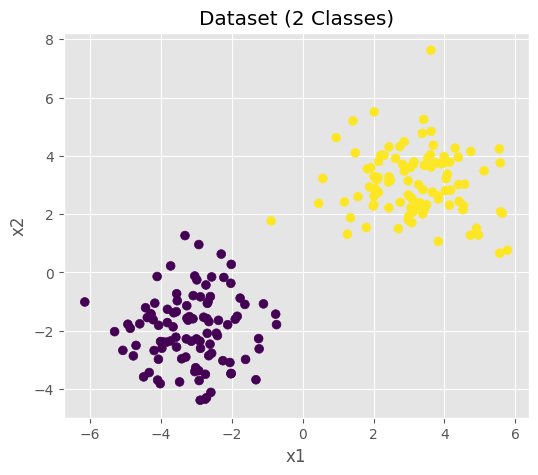

In [4]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, s=40)
plt.title("Dataset (2 Classes)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

## 3. Train/Test Split

In [5]:
perm = np.random.permutation(len(X))
split = int(0.75 * len(X))

train_idx = perm[:split]
test_idx = perm[split:]

X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

## 4. Compute Class Means

In [6]:
def compute_means(X, y):
    return {cls: X[y == cls].mean(axis=0) for cls in np.unique(y)}

means = compute_means(X_train, y_train)
means

{0: array([-3.05377989, -1.92400198]), 1: array([3.14344462, 3.07814075])}

## 5. Compute Within-Class Scatter Matrix

In [7]:
def compute_within_class_scatter(X, y, means):
    Sw = np.zeros((X.shape[1], X.shape[1]))
    for cls in np.unique(y):
        Xc = X[y == cls] - means[cls]
        Sw += Xc.T @ Xc
    return Sw

Sw = compute_within_class_scatter(X_train, y_train, means)
Sw

array([[184.8671098 , -13.35202404],
       [-13.35202404, 207.09558671]])

## 6. Compute Projection Vector \( w \)
Optimal direction:

$$
w = S_w^{-1} ( \mu_1 - \mu_0 )
$$


In [8]:
mean_diff = means[1] - means[0]
w = np.linalg.inv(Sw).dot(mean_diff)
w

array([0.03543209, 0.02643819])

## 7. Compute Decision Threshold
Threshold = midpoint between projected class means.

In [9]:
proj = X_train.dot(w)

t0 = proj[y_train == 0].mean()
t1 = proj[y_train == 1].mean()

threshold = 0.5 * (t0 + t1)
threshold

0.01684517521953162

## 8. LDA Prediction Function

In [10]:
def lda_predict(X, w, threshold):
    proj = X.dot(w)
    return (proj > threshold).astype(int)

## 9. Evaluate LDA Accuracy

In [11]:
y_pred = lda_predict(X_test, w, threshold)
accuracy = np.mean(y_pred == y_test)

print(f"LDA Accuracy: {accuracy:.3f}")

LDA Accuracy: 1.000


## 10. Visualize Linear Decision Boundary

LDA boundary:

$$
w_1 x_1 + w_2 x_2 = \text{threshold}
$$

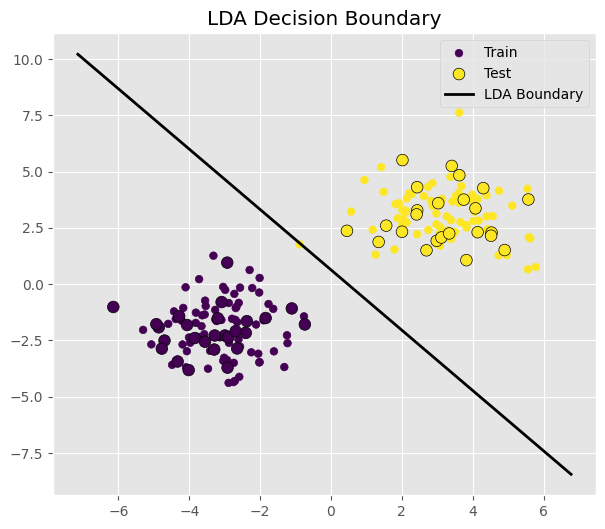

In [12]:
xx = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200)
yy = (threshold - w[0]*xx) / w[1]

plt.figure(figsize=(7,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=30, label="Train")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=70, edgecolors="k", label="Test")
plt.plot(xx, yy, color="black", linewidth=2, label="LDA Boundary")

plt.title("LDA Decision Boundary")
plt.legend()
plt.show()